In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
import joblib


In [44]:
# Import the data and get the basic info about the dataset
df = pd.read_csv("breast-cancer.csv")
print("Dataset loaded Successfully!")
print("Shape of Data:", df.shape)
df.head()

Dataset loaded Successfully!
Shape of Data: (569, 32)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [45]:
#Check missing values and info
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())
# Check the target column values
print("\nDiagnosis Value Counts:\n", df['diagnosis'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

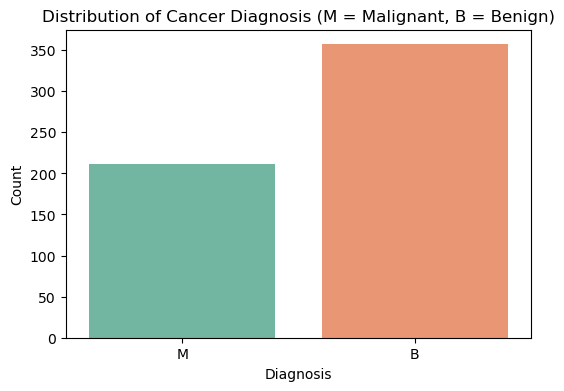

In [46]:
import seaborn as sns
plt.figure(figsize=(6,4))
sns.countplot(x='diagnosis', data=df, palette='Set2')
plt.title("Distribution of Cancer Diagnosis (M = Malignant, B = Benign)")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()

In [47]:
# Convert 'M' (Malignant) → 1, 'B' (Benign) → 0
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})


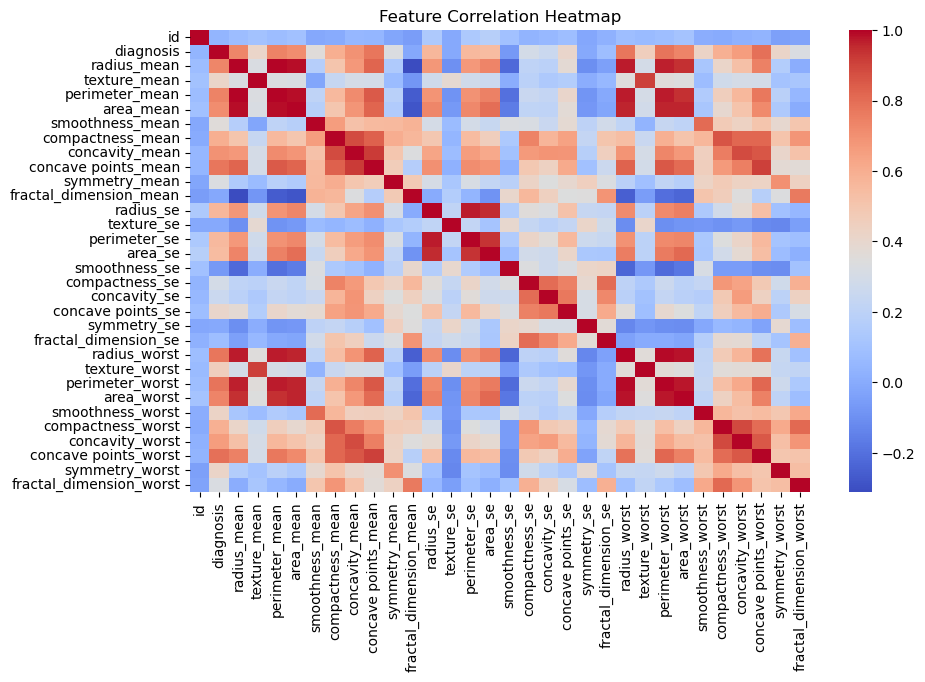

In [48]:
#Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap='coolwarm', cbar=True)
plt.title("Feature Correlation Heatmap")
plt.show()

In [49]:
#Split Data into Train and Test
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training Samples:", X_train.shape[0])
print("Testing Samples:", X_test.shape[0])

Training Samples: 455
Testing Samples: 114


In [50]:
#Train Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
print("Model training completed successfully!")


Model training completed successfully!


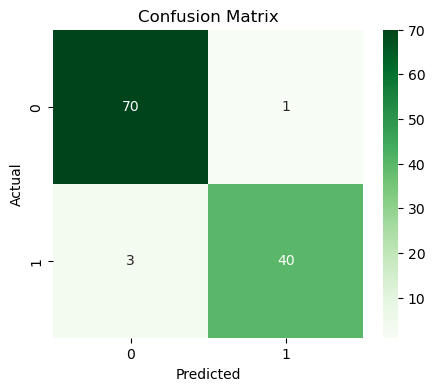

In [51]:
#Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [52]:
#Evaluate Model
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("🎯 Model Accuracy:", round(acc * 100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

🎯 Model Accuracy: 96.49 %

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



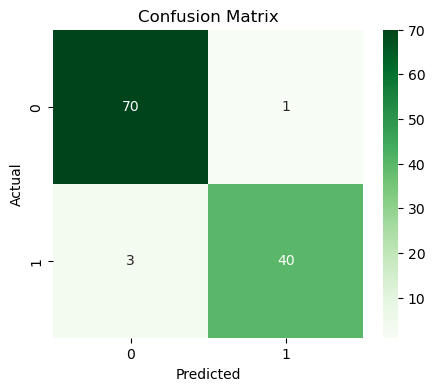

In [53]:
#Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

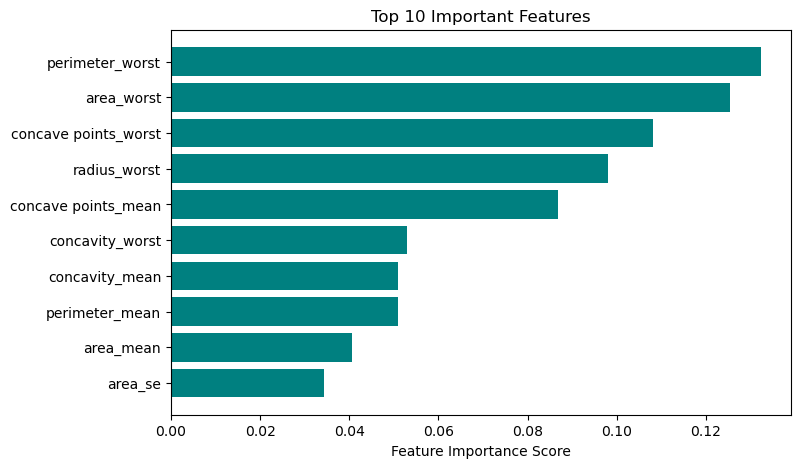

In [54]:
#Feature Importance
importances = model.feature_importances_
indices = np.argsort(importances)[-10:]  # Top 10 features

plt.figure(figsize=(8,5))
plt.barh(range(len(indices)), importances[indices], color='teal')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.title("Top 10 Important Features")
plt.xlabel("Feature Importance Score")
plt.show()

In [55]:
#Test Sample Prediction
sample = X_test.iloc[0].values.reshape(1, -1)
prediction = model.predict(sample)
print("Predicted Class (0 = Benign, 1 = Malignant):", prediction[0])

Predicted Class (0 = Benign, 1 = Malignant): 0


C:\Users\shrey\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [57]:
#Save Model (Optional)
joblib.dump(model, "breast_cancer_model.pkl")
print("Model saved successfully!")

Model saved successfully!
